<a href="https://colab.research.google.com/github/smu-linear-algebra2/hs/blob/main/backpropagation_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0/1000 cost:0.017095729833263098
100/1000 cost:0.1902411543797295
200/1000 cost:0.21944218420738765
300/1000 cost:0.20654848441147158
400/1000 cost:0.028133688818923926
500/1000 cost:0.04549807287573954
600/1000 cost:0.06905066988015389
700/1000 cost:0.011606903878925585
800/1000 cost:0.019357417135688452
900/1000 cost:0.03150200612706068
1000/1000 cost:0.05882375615938462


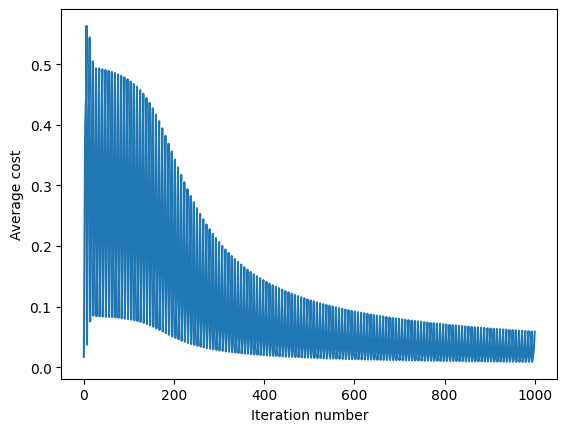

1
[0.93887195]
0
[0.01997389]
0
[0.0310818]
0
[0.04978597]
1
[0.96136315]
1
[0.89999324]
0
[0.10807503]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))
def feed_forward(x,W1,W2,b1,b2):
  a1 = x
  z2 = np.dot(W1,a1)+b1
  a2 = sigmoid(z2)
  z3 = np.dot(W2,a2)+b2
  a3 = sigmoid(z3)
  return a1,a2,a3,z2,z3

node_size = {'input_layer_size':3,
             'hidden_layer_size':3,
             'output_layer_size':1
             }
learning_rate = 2.0

W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2 = np.random.random(node_size['output_layer_size'])
b1 = np.random.random(node_size['hidden_layer_size'])
X = np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y = np.array([1,0,0,0,1,1,0])
count = 0
max_iteration = 1000
dataset_size = len(Y)
list_average_cost = []

while count < max_iteration:
  dW2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
  dW1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
  db2 = np.zeros(node_size['output_layer_size'])
  db1 = np.zeros(node_size['hidden_layer_size'])
  average_cost = 0
  for x,y in zip(X,Y):
    a1,a2,a3,z2,z3 = feed_forward(x,W1,W2,b1,b2)
    # 역전파 알고리즘을 실행
    delta3 = -(y-a3)*sigmoid_derivative(z3)
    average_cost += np.linalg.norm((y-a3),2)/dataset_size
    delta2 = np.dot(W2.T,delta3)*sigmoid_derivative(z2)
    dW2 += np.dot(delta3[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
    db2 += delta3/dataset_size
    dW1 += np.dot(delta2[:,np.newaxis],np.transpose(a1[:,np.newaxis]))/dataset_size
    db1 += delta2/dataset_size
    # 역전파 알고리즘 실행결과를 사용하여 신경망의 가중치와 편향을 업데이트한다.
    W2 += -learning_rate*dW2
    b2 += -learning_rate*db2
    W1 += -learning_rate*dW1
    b1 += -learning_rate*db1
    # 매 반복시 측정된 비율을 리스트에 저장
    list_average_cost.append(average_cost)
    if count%100 == 0:
      print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    count += 1
# 반복횟수에 대비 비용그래프로 그린다.
Figure,ax = plt.subplots(1,1)
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X,Y):
  a1,a2,a3,z2,z3 = feed_forward(x,W1,W2,b1,b2)
  print(y)
  print(a3)